# Projekt -> predviđanje profesionalnih eSports igrača

Dodavanje svih potrebnih biblioteka.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

Podaci su podjeljeni u 22 direktorija. Svaki direktoriji odgovara jednoj igri. Svaka igra ima 5 poddirektorija za svakog igrača na timu.  
Podaci\matches\match_X\ gdje X predstavla broj od 0 da 22 

### Podaci o igri 0

In [53]:
game_info = pd.read_json("Podaci\matches\match_0\meta_info.json", orient="index")
print (game_info)


                            0
match_duration            957
season_id                  13
game_version    9.22.296.5720
real_opponents              0
communication               1
team                 amateurs
day_num                     0
day_match_num               0
Podaci\matches\match_0\replay.json


Iz ovoga vidimo da je su ovu igru igrali amateri protiv računala.

### Učitati podatke iz igre 0

In [110]:
replay = pd.read_json("Podaci\matches\match_0\\replay.json", typ='series', orient="index")

Iz učitanih podataka i mojeg prijašnjeg iskustva s igrom predpostavljam da su gledani subjekti player_0 do player_4  
Kako nam je cilj doznati jeli možemo reći nešto o vještini igrača pomoću njegovih fizioloških parametara  
Iz replay ćemo izvaditi kada su umrli, ubili nekoga i asistencija u igri i usporediti ih s brojem otkucaja srca  
Koristiti ćemo player_0 za demonstraciju

       heart_rate
count  958.000000
mean    86.345890
std      4.731563
min     75.741935
25%     83.008065
50%     85.806452
75%     88.830645
max    102.000000
heart_rate    462
dtype: int64


<Figure size 640x480 with 0 Axes>

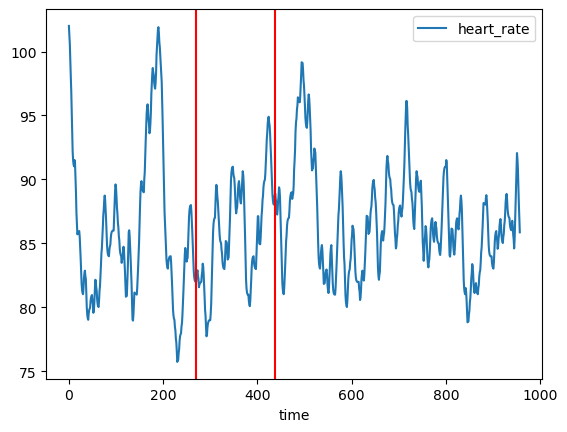

<Figure size 640x480 with 0 Axes>

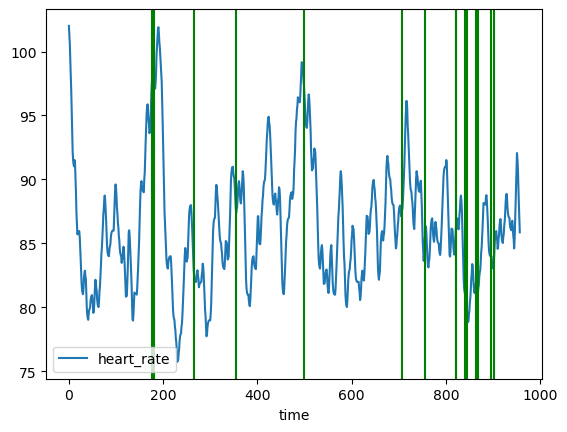

<Figure size 640x480 with 0 Axes>

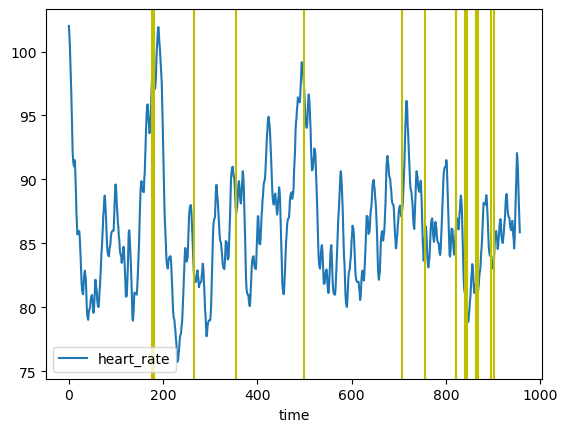

In [113]:
p0_brojotkucaja = pd.read_csv("Podaci\matches\match_0\player_0\heart_rate.csv", header=0, index_col=0)
plt.figure()
print (p0_brojotkucaja.describe())
print (p0_brojotkucaja.nunique())
p0_brojotkucaja.plot()
p0_dt = replay["player_0"]["deathTimes"]
p0_dt = np.round(p0_dt, 0)
for i in p0_dt:
    plt.axvline(i, color='r')
plt.figure()
p0_brojotkucaja.plot()
p0_kt = replay["player_0"]["killTimes"]
p0_kt = np.round(p0_kt, 0)
for i in p0_kt:
    plt.axvline(i, color='g')
plt.figure()
p0_brojotkucaja.plot()
p0_as = replay["player_0"]["assistTimes"]
p0_as = np.round(p0_as, 0)
for i in p0_kt:
    plt.axvline(i, color='y')

Pogledadajmo varijable okoline.

       env_temperature  env_pressure    altitude  env_humidity     env_co2
count       958.000000    958.000000  958.000000    958.000000  958.000000
mean         26.247912    973.355981  343.766848     23.700783  445.240084
std           0.203820      0.056154    0.480334      0.324542   26.451604
min          25.940000    973.200000  342.430000     22.510000  401.000000
25%          26.090000    973.310000  343.390000     23.482500  419.000000
50%          26.180000    973.360000  343.730000     23.740000  446.000000
75%          26.400000    973.400000  344.147500     23.900000  473.000000
max          26.650000    973.500000  344.960000     24.590000  478.000000
env_temperature     72
env_pressure        30
altitude           195
env_humidity       154
env_co2             26
dtype: int64


<AxesSubplot:xlabel='time'>

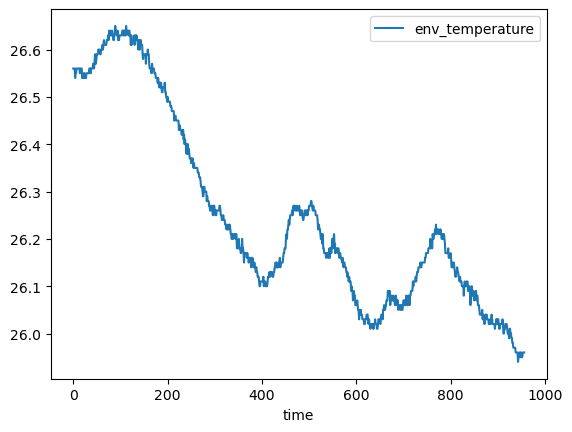

In [126]:
environment = pd.read_csv("Podaci\matches\match_0\environment.csv", header=0, index_col=0)
print (environment.describe())
print (environment.nunique())
environment.plot(y=0)

Pogledajmo njegovo mišljenje o igri kroz anketu koju je ispunio.

In [111]:
pd.read_json("Podaci\matches\match_0\player_0\player_report.json", typ='series', orient="index")

role                                top
performance_evaluation                4
performance_evaluation_teammates      4
mental_load                           1
sensing_system_disturbance           no
dtype: object

Iz njegovog odgovora možemo vidjeti da je sretan s svojim igrom i da mu nije bilo pre zahtjevno

### Igra 1  
Uzmimo sada drugu igru istoga igrača i pokušajmo vidjeti ima li razlika u grafovima


In [114]:
game_info = pd.read_json("Podaci\matches\match_1\meta_info.json", orient="index")
print (game_info)

                            0
match_duration           1532
season_id                  13
game_version    9.22.296.5720
real_opponents              1
communication               1
team                 amateurs
day_num                     0
day_match_num               1


Vidimo da ovu igru isto amaterski tim ali ovaj put igraju protiv ljudskog protivnika

        heart_rate
count  1533.000000
mean     93.830996
std       6.667233
min      76.483871
25%      89.612903
50%      93.838710
75%      97.709677
max     117.161290
heart_rate    698
dtype: int64


<Figure size 640x480 with 0 Axes>

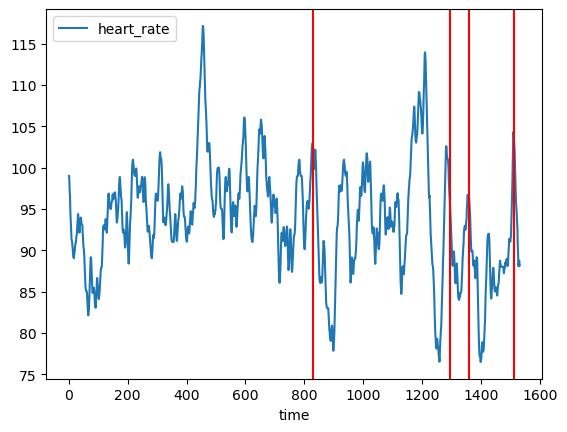

<Figure size 640x480 with 0 Axes>

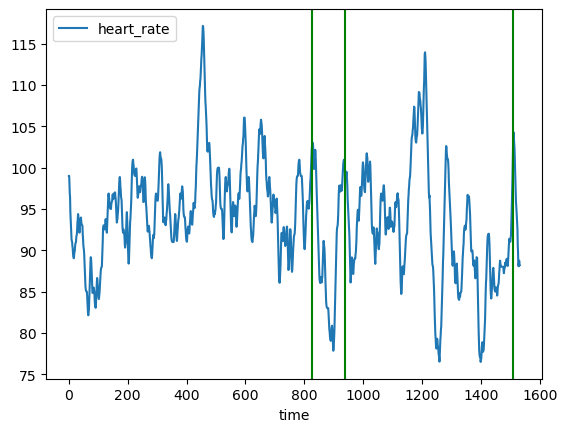

<Figure size 640x480 with 0 Axes>

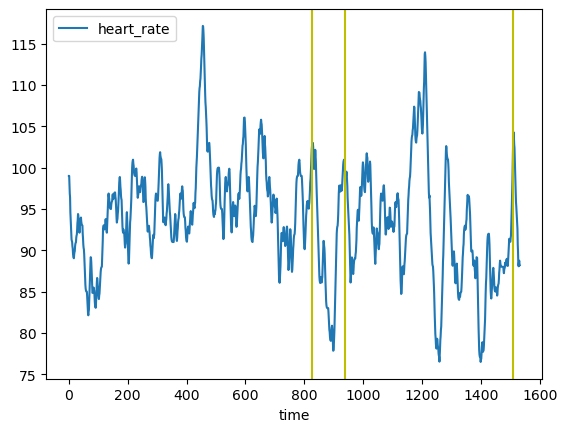

In [115]:
replay = pd.read_json("Podaci\matches\match_1\\replay.json", typ='series', orient="index")
p0_brojotkucaja = pd.read_csv("Podaci\matches\match_1\player_0\heart_rate.csv", header=0, index_col=0)
plt.figure()
print (p0_brojotkucaja.describe())
print (p0_brojotkucaja.nunique())
p0_brojotkucaja.plot()
p0_dt = replay["player_0"]["deathTimes"]
p0_dt = np.round(p0_dt, 0)
for i in p0_dt:
    plt.axvline(i, color='r')
plt.figure()
p0_brojotkucaja.plot()
p0_kt = replay["player_0"]["killTimes"]
p0_kt = np.round(p0_kt, 0)
for i in p0_kt:
    plt.axvline(i, color='g')
plt.figure()
p0_brojotkucaja.plot()
p0_as = replay["player_0"]["assistTimes"]
p0_as = np.round(p0_as, 0)
for i in p0_kt:
    plt.axvline(i, color='y')

Pogledajmo varijable okoline.

       env_temperature  env_pressure     altitude  env_humidity      env_co2
count      1532.000000    1532.00000  1532.000000   1532.000000  1532.000000
mean         26.629706     973.12938   345.721436     22.784589   398.242167
std           0.203578       0.11503     0.997503      0.403147     0.620337
min          26.140000     972.91000   343.480000     21.760000   397.000000
25%          26.460000     973.03000   344.787500     22.480000   398.000000
50%          26.690000     973.11000   345.910000     22.750000   398.000000
75%          26.820000     973.24000   346.630000     23.070000   399.000000
max          26.880000     973.38000   347.580000     24.300000   399.000000
env_temperature     70
env_pressure        47
altitude           313
env_humidity       196
env_co2              3
dtype: int64


<AxesSubplot:xlabel='time'>

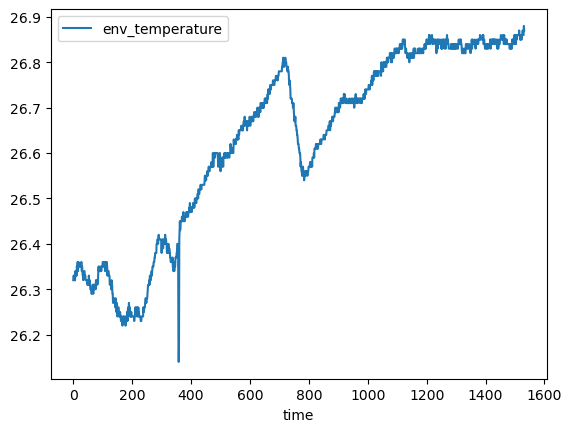

In [125]:
environment = pd.read_csv("Podaci\matches\match_1\environment.csv", header=0, index_col=0)
print (environment.describe())
print (environment.nunique())
environment.plot(y=0)

Pogledajmo njegovo mišljenje o igri kroz anketu koju je ispunio.

In [128]:
pd.read_json("Podaci\matches\match_1\player_0\player_report.json", typ='series', orient="index")

role                                top
performance_evaluation                3
performance_evaluation_teammates      3
mental_load                           3
sensing_system_disturbance           no
dtype: object

U ovoj igri je manje zadovoljan sa svojim performansom i rekao je da mu je ova igra bila mentalno napornija.



Na ovim prikazima vidimo da nemožemo zaključiti pno samo iz otkucaja srca tako da ćemo morati pogledati što nam daju i ostali podaci.

Pogledajmo sve grafove za player_0 iz match_0


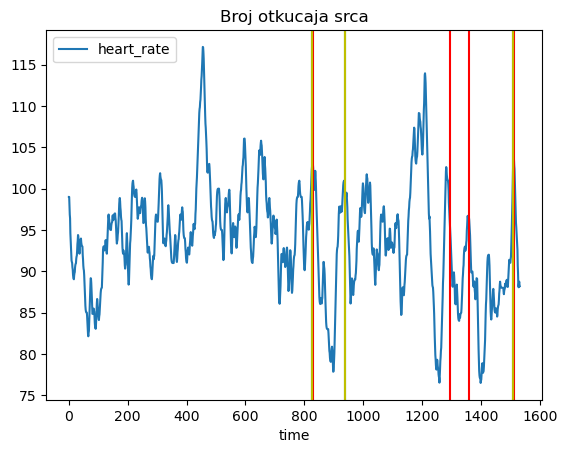

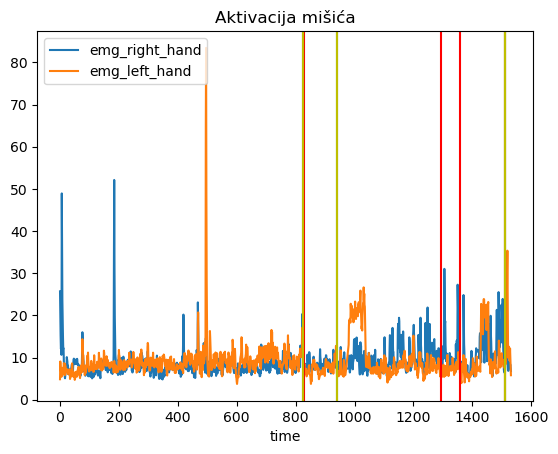

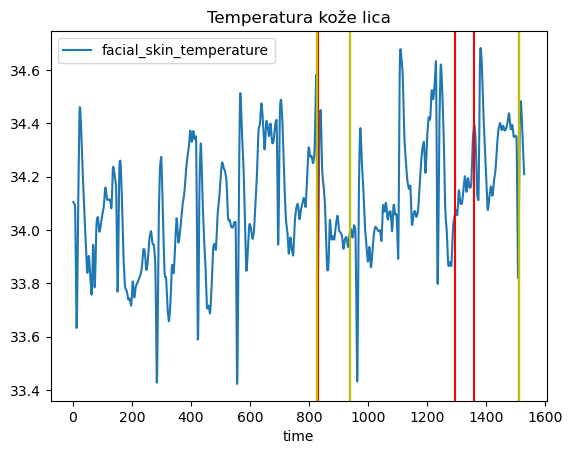

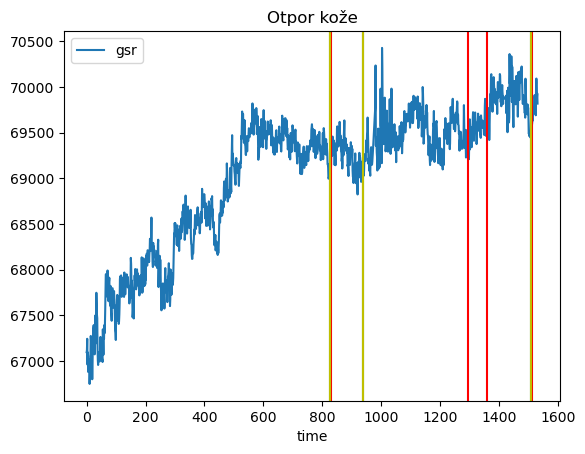

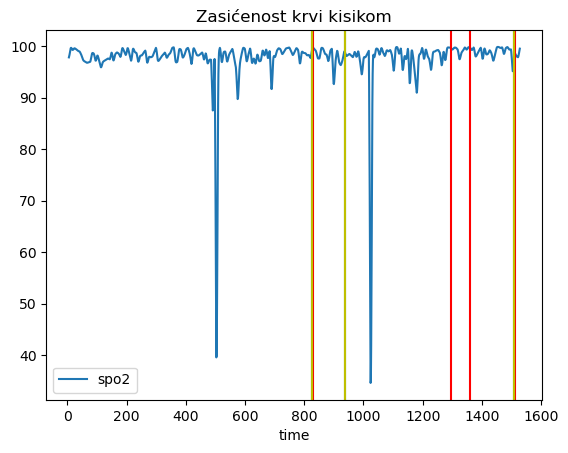

In [159]:
replay = pd.read_json("Podaci\matches\match_1\\replay.json", typ='series', orient="index")
p0_brojotkucaja = pd.read_csv("Podaci\matches\match_1\player_0\heart_rate.csv", header=0, index_col=0)
p0_brojotkucaja.plot()
plt.title("Broj otkucaja srca")
p0_dt = replay["player_0"]["deathTimes"]
p0_dt = np.round(p0_dt, 0)
for i in p0_dt:
    plt.axvline(i, color='r')
p0_kt = replay["player_0"]["killTimes"]
p0_kt = np.round(p0_kt, 0)
for i in p0_kt:
    plt.axvline(i, color='g')
p0_as = replay["player_0"]["assistTimes"]
p0_as = np.round(p0_as, 0)
for i in p0_kt:
    plt.axvline(i, color='y')

p0_emg = pd.read_csv("Podaci\matches\match_1\player_0\emg.csv", header=0, index_col=0)
p0_emg.plot(y=[0, 1])
plt.title("Aktivacija mišića")
for i in p0_dt:
    plt.axvline(i, color='r')
for i in p0_kt:
    plt.axvline(i, color='g')  
for i in p0_kt:
    plt.axvline(i, color='y')

p0_fst = pd.read_csv("Podaci\matches\match_1\player_0\\facial_skin_temperature.csv", header=0, index_col=0)
p0_fst.plot()
plt.title("Temperatura kože lica")
for i in p0_dt:
    plt.axvline(i, color='r')
for i in p0_kt:
    plt.axvline(i, color='g')  
for i in p0_kt:
    plt.axvline(i, color='y')

p0_gsr = pd.read_csv("Podaci\matches\match_1\player_0\gsr.csv", header=0, index_col=0)
p0_gsr.plot()
plt.title("Otpor kože")
for i in p0_dt:
    plt.axvline(i, color='r')
for i in p0_kt:
    plt.axvline(i, color='g')  
for i in p0_kt:
    plt.axvline(i, color='y')

p0_kisik = pd.read_csv("Podaci\matches\match_1\player_0\spo2.csv", header=0, index_col=0)
p0_kisik.plot()
plt.title("Zasićenost krvi kisikom")
for i in p0_dt:
    plt.axvline(i, color='r')
for i in p0_kt:
    plt.axvline(i, color='g')  
for i in p0_kt:
    plt.axvline(i, color='y')
